In [116]:
import numpy
import pandas

df = pandas.read_csv("./data/ds1368_tx_All_Data_14_2015_1005_174847.txt", sep="\t")

# print(df[0:5])
# print(df.describe())

df = df[["Anon Student Id", "Problem Name", "Attempt At Step", "Step Name", "Is Last Attempt", "Outcome", "KC (Original)"]]
# print(df.describe())

df.rename(columns={"Anon Student Id":"s_id", "Problem Name":"p_id"}, inplace=True)
students = df["s_id"].unique()
problems = df["p_id"].unique()
df["ps_id"] = df["s_id"]+"~"+df["p_id"]

unique_ps_pairs = df["ps_id"].unique()
print(len(unique_ps_pairs),"unique PS pairs",unique_ps_pairs)


958 unique PS pairs ['Stu_011b2ea4facf6b0918d76c91afb0831f~DOG_ON_A_ROPE'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~LAWN_SPRINKLER_2'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_DIAMETER'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_AREA'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_CIRCUMFERENCE'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~LAWN_SPRINKLER'
 'Stu_011b2ea4facf6b0918d76c91afb0831f~CIRCLE_RADIUS'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_ABCD'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_AREA'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_HEIGHT'
 'Stu_02dd51930962a6c4ef2ff9c63d035c4a~TRAPEZOID_BASE'
 'Stu_048fd8824ba2329dd9a8085692b601e4~RECTANGLE_ABCD'
 'Stu_048fd8824ba2329dd9a8085692b601e4~BUILDING_A_SIDEWALK'
 'Stu_048fd8824ba2329dd9a8085692b601e4~PARALLELOGRAM_ABDE'
 'Stu_048fd8824ba2329dd9a8085692b601e4~SQUARE_ABCD'
 'Stu_048fd8824ba2329dd9a8085692b601e4~PAINTING_THE_WALL'
 'Stu_048fd8824ba2329dd9a8085692b601e4~TRAPEZOID_ABCD'
 'Stu_048fd8824ba2329dd9a80856

In [117]:
from collections import defaultdict
p_st = defaultdict(set)
KCs = set()
p_kc = defaultdict(set)
for p in problems:
    sp_step_df = df[df["p_id"]==p]#.sort_values(by=["Step End Time"])
    #print(sp_step_df)
    for st in sp_step_df["Step Name"].unique():
        p_st[p].add(st)
    for kc in sp_step_df["KC (Original)"]:
        KCs.add(kc)
        p_kc[p].add(kc)

df2 = pandas.DataFrame(index=problems, columns=["#kcs","#steps"])
for p in p_st:
#     print("({})\t\t".format(p),p_st[p])
#     print("({})\t\t".format(p),len(p_kc[p]))
    df2.loc[p]=([len(p_kc[p]), len(p_st[p])])
    
print(df2)

                       #kcs  #steps
DOG_ON_A_ROPE             2       2
LAWN_SPRINKLER_2          3       3
CIRCLE_DIAMETER           3       3
CIRCLE_AREA               3       3
CIRCLE_CIRCUMFERENCE      3       3
LAWN_SPRINKLER            1       1
CIRCLE_RADIUS             3       3
TRAPEZOID_ABCD            3       3
TRAPEZOID_AREA            1       1
TRAPEZOID_HEIGHT          1       1
TRAPEZOID_BASE            1       1
RECTANGLE_ABCD            2       3
BUILDING_A_SIDEWALK       2       9
PARALLELOGRAM_ABDE        2       3
SQUARE_ABCD               2       3
PAINTING_THE_WALL         2       9
TRIANGLE_ABC              2       3
TRIANGLE_TRIANGLE         1       1
PENTAGON                  2       3
TRIANGLE_RECTANGLE        2       2
DESIGNING_A_QUILT         2      12
PENTAGON_ABCDE            2       3
TRIANGLE_AREA             1       1
TRIANGLE_HEIGHT           1       1
TRIANGLE_BASE             1       1
CIRCLE_O                  4      13
COVERING_POOL             2 

In [118]:
print("#probs",len(problems))
print("#students",len(students))
print("#KCs",len(df["KC (Original)"].unique()))
# print(df[0:10])

all_sz = []
all_qz = []
all_pfz= []

q_pass = defaultdict(int)
q_atts = defaultdict(int)

qixs = []
sct=-1
for s in students:
    sct+=1
    s_df = df[df["s_id"]==s]
    students_problems = s_df["p_id"].unique()
    
    for p in students_problems:
        sp_step_df = s_df[(s_df["p_id"]==p)] # & (s_df["Outcome"]=="CORRECT" )]#.sort_values(by=["Step End Time"])
        #print(sp_step_df)
        print(s,p)
                          
#         max_atts = numpy.max(sp_step_df["Attempt At Step"])
#         max_atts = len(sp_step_df[sp_step_df["Outcome"]!="CORRECT"]["Attempt At Step"])
#         step_passes = len(sp_step_df[sp_step_df["Outcome"]=="CORRECT"]["Attempt At Step"])
#         print(max_atts, step_passes)
# #         max_atts=(max_atts+step_passes)
#         print("max_atts for",p,"=",max_atts)
        max_atts = 1
#         for ind,row in sp_step_df[["Step Name","Attempt At Step","Outcome","KC (Original)"]].iterrows():
#             print("\t", list(row))
            
        steps_not_done = p_st[p] - set(sp_step_df[sp_step_df["Outcome"]=="CORRECT"]["Step Name"])
        print("steps not done", steps_not_done)
    
#         if False: #p not in students_problems:
#             pass
#             all_pfz.append(0.5)
#             q_pass[p]+=0.5
#         else:
        if p not in qixs:
            qixs.append(p)
        qix = qixs.index(p)
        
        if len(steps_not_done)==0: #empty set
#             for _ in range(round(step_passes)):
#             n_ones = sum(all_pfz)
#             n_zeros = len(all_pfz) - n_ones 
#             if (n_zeros>n_ones):
            all_sz.append(sct)
            all_qz.append(qix)
            all_pfz.append(1)
            q_pass[p]+=1
        else:
            for _ in range(round(max_atts)):        
                all_sz.append(sct)
                all_qz.append(qix)
                all_pfz.append(0)
        q_atts[p]+=1

all_sz = numpy.array(all_sz).reshape([-1,1])
all_qz = numpy.array(all_qz).reshape([-1,1])
all_pfz = numpy.array(all_pfz).reshape([-1,1])

for p in problems:
    print(p, (q_pass[p]/q_atts[p] if q_atts[p] else -1))

#probs 40
#students 59
#KCs 15
Stu_011b2ea4facf6b0918d76c91afb0831f DOG_ON_A_ROPE
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER_2
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_DIAMETER
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_AREA
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_CIRCUMFERENCE
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f LAWN_SPRINKLER
steps not done set()
Stu_011b2ea4facf6b0918d76c91afb0831f CIRCLE_RADIUS
steps not done set()
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_ABCD
steps not done set()
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_AREA
steps not done set()
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_HEIGHT
steps not done set()
Stu_02dd51930962a6c4ef2ff9c63d035c4a TRAPEZOID_BASE
steps not done set()
Stu_048fd8824ba2329dd9a8085692b601e4 RECTANGLE_ABCD
steps not done set()
Stu_048fd8824ba2329dd9a8085692b601e4 BUILDING_A_SIDEWALK
steps not done set()
Stu_048fd

Stu_1f5f6af5eed10d3bddff33affc928254 RECTANGLE_ABCD
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 BUILDING_A_SIDEWALK
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 PARALLELOGRAM_ABDE
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 SQUARE_ABCD
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 PAINTING_THE_WALL
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRAPEZOID_ABCD
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRAPEZOID_AREA
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRAPEZOID_HEIGHT
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRAPEZOID_BASE
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRIANGLE_ABC
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRIANGLE_TRIANGLE
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 PENTAGON
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 TRIANGLE_RECTANGLE
steps not done set()
Stu_1f5f6af5eed10d3bddff33affc928254 DESI

steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb PAINTING_THE_WALL
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb RECTANGLE_HEIGHT
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRAPEZOID_ABCD
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRAPEZOID_AREA
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRAPEZOID_HEIGHT
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRAPEZOID_BASE
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRIANGLE_ABC
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRIANGLE_TRIANGLE
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb PENTAGON
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb TRIANGLE_RECTANGLE
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb DESIGNING_A_QUILT
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb PENTAGON_ABCDE
steps not done set()
Stu_3e22eb1b6a4c0596cebd74ef368e5ccb CIRCLE_O
steps not done {'(DIAMETER QUESTION1)'}
Stu_3e22

Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_DIAMETER
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_AREA
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_RADIUS
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f CIRCLE_CIRCUMFERENCE
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f TROGS
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f WATERING_VEGGIES
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f POGS
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f ONE_CIRCLE_IN_SQUARE
steps not done set()
Stu_5046a9958b6d489aa529be890cb7cb8f TWO_CIRCLES_IN_CIRCLE
steps not done {'(UNSHADED-AREA QUESTION1)'}
Stu_5046a9958b6d489aa529be890cb7cb8f TWO_CIRCLES_IN_SQUARE
steps not done {'(UNSHADED-AREA QUESTION1)'}
Stu_5046a9958b6d489aa529be890cb7cb8f TRIANGLE_AREA
steps not done set()
Stu_5114edb143c95b7d599717b63807cdca PAINTING_THE_WALL
steps not done {'(DOOR-AREA QUESTION1)'}
Stu_5114edb143c95b7d599717b63807cdca TRAPEZOID_A

Stu_7db1d29c5d51d837db8a0c449581762d TRAPEZOID_BASE
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_ABC
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_TRIANGLE
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d PENTAGON
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_RECTANGLE
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d DESIGNING_A_QUILT
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d PENTAGON_ABCDE
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_AREA
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_HEIGHT
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d TRIANGLE_BASE
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d CIRCLE_O
steps not done {'(DIAMETER QUESTION1)'}
Stu_7db1d29c5d51d837db8a0c449581762d LAWN_SPRINKLER
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d COVERING_POOL
steps not done set()
Stu_7db1d29c5d51d837db8a0c449581762d D

steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 TRAPEZOID_BASE
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 TRIANGLE_ABC
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 TRIANGLE_TRIANGLE
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 PENTAGON
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 TRIANGLE_RECTANGLE
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 DESIGNING_A_QUILT
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 PENTAGON_ABCDE
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 TRIANGLE_AREA
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 CIRCLE_O
steps not done {'(DIAMETER QUESTION1)'}
Stu_98d4c155575ef75ef32b283bb53943f5 LAWN_SPRINKLER
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 COVERING_POOL
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 DOG_ON_A_ROPE
steps not done set()
Stu_98d4c155575ef75ef32b283bb53943f5 LAWN_SPRINKLER_2
steps not done set()
Stu_98d4c155575e

steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRAPEZOID_HEIGHT
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRAPEZOID_BASE
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_ABC
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_TRIANGLE
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 PENTAGON
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_RECTANGLE
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 DESIGNING_A_QUILT
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 PENTAGON_ABCDE
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_HEIGHT
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 TRIANGLE_BASE
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 CIRCLE_O
steps not done {'(DIAMETER QUESTION1)'}
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 LAWN_SPRINKLER
steps not done set()
Stu_cfe6ab2a8660fdf288fdc82f72f2d637 COVERING_POOL
steps not done set()
Stu_cfe6ab2a86

Stu_ecc4309737d7c8f74239e6696dd8b4f3 RECTANGLE_ABCD
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 BUILDING_A_SIDEWALK
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 PARALLELOGRAM_ABDE
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 SQUARE_ABCD
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 PAINTING_THE_WALL
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRAPEZOID_ABCD
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRAPEZOID_AREA
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRAPEZOID_HEIGHT
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRAPEZOID_BASE
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRIANGLE_ABC
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRIANGLE_TRIANGLE
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 PENTAGON
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 TRIANGLE_RECTANGLE
steps not done set()
Stu_ecc4309737d7c8f74239e6696dd8b4f3 DESI

In [119]:
for s,q,pf in zip(all_sz,all_qz,all_pfz):
    print(s,q,pf)

[0] [0] [1]
[0] [1] [1]
[0] [2] [1]
[0] [3] [1]
[0] [4] [1]
[0] [5] [1]
[0] [6] [1]
[1] [7] [1]
[1] [8] [1]
[1] [9] [1]
[1] [10] [1]
[2] [11] [1]
[2] [12] [1]
[2] [13] [1]
[2] [14] [1]
[2] [15] [1]
[2] [7] [1]
[2] [8] [1]
[3] [11] [1]
[3] [12] [1]
[3] [13] [1]
[3] [14] [1]
[3] [15] [1]
[3] [7] [1]
[3] [8] [1]
[3] [9] [1]
[3] [10] [1]
[3] [16] [1]
[3] [17] [1]
[3] [18] [1]
[3] [19] [1]
[3] [20] [1]
[3] [21] [1]
[3] [22] [1]
[3] [23] [1]
[3] [24] [1]
[3] [25] [0]
[3] [5] [1]
[3] [26] [1]
[3] [0] [1]
[3] [1] [1]
[3] [2] [1]
[3] [3] [1]
[3] [6] [1]
[3] [27] [1]
[3] [28] [1]
[3] [29] [0]
[3] [30] [1]
[3] [31] [1]
[3] [32] [0]
[3] [33] [0]
[3] [4] [1]
[4] [0] [1]
[4] [5] [1]
[4] [1] [1]
[4] [27] [1]
[4] [28] [1]
[4] [29] [1]
[5] [9] [1]
[5] [10] [1]
[5] [17] [1]
[5] [18] [1]
[5] [19] [1]
[6] [30] [1]
[6] [31] [1]
[6] [32] [0]
[7] [32] [0]
[7] [33] [0]
[7] [34] [1]
[7] [35] [1]
[7] [29] [1]
[7] [22] [1]
[7] [19] [1]
[7] [20] [1]
[7] [26] [1]
[7] [2] [1]
[8] [11] [1]
[8] [12] [1]
[8] [13] [1]


[40] [19] [1]
[40] [20] [0]
[41] [23] [1]
[41] [21] [1]
[41] [18] [1]
[41] [25] [0]
[41] [5] [1]
[41] [26] [1]
[41] [0] [1]
[41] [1] [1]
[41] [2] [1]
[41] [3] [1]
[41] [6] [1]
[41] [27] [1]
[41] [28] [1]
[42] [33] [1]
[43] [11] [1]
[43] [12] [1]
[43] [13] [1]
[43] [14] [1]
[43] [15] [1]
[43] [34] [1]
[43] [35] [1]
[43] [36] [1]
[43] [7] [1]
[43] [8] [1]
[43] [9] [1]
[43] [10] [1]
[44] [17] [1]
[44] [22] [1]
[44] [19] [1]
[44] [16] [1]
[44] [21] [1]
[44] [18] [1]
[44] [25] [0]
[44] [5] [1]
[44] [26] [1]
[44] [0] [1]
[44] [1] [1]
[44] [2] [1]
[44] [6] [1]
[44] [27] [1]
[44] [28] [1]
[44] [29] [1]
[44] [30] [0]
[45] [11] [1]
[45] [12] [1]
[45] [13] [1]
[45] [14] [1]
[45] [15] [1]
[45] [7] [1]
[45] [8] [1]
[45] [9] [1]
[45] [10] [1]
[45] [16] [1]
[45] [17] [1]
[45] [18] [1]
[45] [19] [1]
[45] [20] [1]
[45] [21] [1]
[45] [23] [1]
[45] [24] [1]
[45] [25] [0]
[45] [5] [1]
[45] [26] [1]
[45] [0] [1]
[45] [1] [1]
[45] [2] [1]
[45] [6] [1]
[45] [3] [1]
[45] [4] [1]
[45] [27] [1]
[45] [28] [1]
[4

In [120]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda
from keras import backend as K
from keras import Model
def generate_qs_model(qn_table, psi_table, optimiser):
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")
    print(qn_table, psi_table, psi_sel, qn_sel)
    print("psi_sel shape", psi_sel.shape)

    psi_table.trainable=True
    qn_table.trainable=True
    
    qn_row = qn_table(qn_sel)
#     qn_row = GaussianNoise(.5)(qn_row)
    psi_row = psi_table(psi_sel)
#     psi_row = GaussianNoise(0.5)(psi_row)
    
#     prds = multiply([qn_row, psi_row])
    difs = subtract([psi_row, qn_row])
#     score = Lambda(lambda ps: K.sum(ps, axis=1, keepdims=True)/n_factors, name="score")(prds)
    klip = Lambda(lambda q: K.clip(q,0,1))
    q_masque = klip(qn_row)
#     q_klippt = klip(qn_table.kernel)
#     onez_score = Lambda(lambda x: 1000*K.sum(x, axis=1, keepdims=True))(q_masque)
    
    Prs = Lambda(lambda z: (1.0 / (1.0 + K.exp(-z))), name="Pr_sigmoid1")(difs)
    Prs = Lambda(lambda ps_q:  ps_q[0]*ps_q[1] + (1.0-ps_q[1]) ) ([Prs, q_masque])
    
    score = Lambda(lambda ps: K.prod(ps, axis=1, keepdims=True), name="score")(Prs)
#     L_2 = Lambda(lambda w: K.sqrt(K.mean(K.square(w))))
#     L_2 = K.sum(q_masque * Prs, axis=1, keepdims=True)

#     sumstack = Lambda(lambda w: K.sum(w,axis=1,keepdims=True))
#     sumstack = sumstack(q_klippt)
#     sumstack = Lambda(lambda w: K.mean(K.abs(K.zeros_like(w)-w)))(sumstack)
    
#     L_2 = Lambda(lambda w: K.mean(K.square(K.ones_like(w) - w)))
    L_2a = Lambda(lambda w: K.mean(K.abs(K.zeros_like(w)-w)))
#     mag_loss = (L_2a(qn_table.kernel) + sumstack)
    
    mag_loss = L_2a(qn_table.kernel)
    
#     mag_loss = L_2(qn_row)
    
    def custom_loss(mag_loss):
        def orig_loss(yt,yh):
            return K.binary_crossentropy(yt,yh) * mag_loss #+mag_loss # (reg_loss+mag_loss)/2
        return orig_loss
    
    model = Model(inputs=[qn_sel, psi_sel], outputs=score)
    model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])
#     model.compile(optimizer=optimiser, loss=custom_loss(mag_loss), metrics=["accuracy"])

    print(model.summary())

    return model

In [121]:
from NN_utils import BigTable, WeightClip
from keras.optimizers import Adam
from keras import regularizers

n_factors = len(KCs)
n_students = len(students)
n_questions = len(qixs)

inv_sigmoid = lambda p: -numpy.log(1/p - 1)
p50 = inv_sigmoid( 0.5**(1/n_factors) )
print("p50 is ", p50)

s_table =  BigTable((n_students, n_factors), 6, 100, init_hilo=10)#, regulariser=regularizers.l1(10e-6))
qn_table = BigTable((n_questions, n_factors), 0, 100, init_hilo=10-p50)#, regulariser=regularizers.l1(10e-6))

m = generate_qs_model(qn_table, s_table, Adam())

frak=1
all_pairs = [(s,q) for s,q in zip(all_sz,all_qz)]
all_pair_ixs = list(range(len(all_pairs)))
# ixs_to_use = numpy.random.choice(all_pair_ixs, size=int(max(frak*len(all_pairs),10)), replace=True)
# pairs_to_use = numpy.array(all_pairs)[ixs_to_use]

all_ixs = list(range(len(all_pfz)))
val_ixs = numpy.random.choice(all_pair_ixs, size=int(len(all_pair_ixs)/10), replace=False) #len(attempts)//100, replace=False)
trn_ixs = list(set(all_ixs) - set(val_ixs))
test_ixs = val_ixs
# test_ixs = val_ixs[0:len(val_ixs)//2]
# val_ixs = val_ixs[len(val_ixs)//2:]

# vsz = all_sz[val_ixs]
# vqz = all_qz[val_ixs]
# vpfz = all_pfz[val_ixs]

tsz = all_sz[test_ixs]
tqz = all_qz[test_ixs]
tpfz = all_pfz[test_ixs]

sz = all_sz[trn_ixs]
qz = all_qz[trn_ixs]
pfz = all_pfz[trn_ixs]
bal_sz = []
bal_qz = []
bal_pfz = []
# for s,z,p in zip(sz,qz,pfz):
#     n_ones = sum(bal_pfz)
#     n_zeros = len(bal_pfz)-n_ones
#     if p==1:
#         if n_ones < n_zeros*3:
#             bal_pfz.append(p)
#             bal_sz.append(s)
#             bal_qz.append(q)
#     else:
#         bal_pfz.append(p)
#         bal_sz.append(s)
#         bal_qz.append(q)

# qz =numpy.array(bal_qz)
# sz =numpy.array(bal_sz)
# pfz=numpy.array(bal_pfz)
print(len(pfz), sum(pfz))

p50 is  3.05136924447
<NN_utils.BigTable object at 0x7f39e40de518> <NN_utils.BigTable object at 0x7f39da42c5f8> Tensor("psi_select_3:0", shape=(?, 1), dtype=int32) Tensor("q_select_3:0", shape=(?, 1), dtype=int32)
psi_sel shape (?, 1)
kk (40, 15)
selector shape (?, 1)
flat selector shape (?,)
call kk (40, 15)
'rows' shape, (?, 15)
kk (59, 15)
selector shape (?, 1)
flat selector shape (?,)
call kk (59, 15)
'rows' shape, (?, 15)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
psi_select (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
q_select (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________

In [122]:
for s,q, pf in zip(sz,qz,pfz):
    print(s,q,pf)
    
print("~ ~ ~ ~ ~")
for s,q, pf in zip(tsz,tqz,tpfz):
    print(s,q,pf)

[0] [0] [1]
[0] [1] [1]
[0] [2] [1]
[0] [3] [1]
[0] [4] [1]
[0] [5] [1]
[0] [6] [1]
[1] [7] [1]
[1] [8] [1]
[1] [9] [1]
[1] [10] [1]
[2] [11] [1]
[2] [12] [1]
[2] [13] [1]
[2] [14] [1]
[2] [15] [1]
[2] [8] [1]
[3] [11] [1]
[3] [12] [1]
[3] [13] [1]
[3] [14] [1]
[3] [15] [1]
[3] [7] [1]
[3] [10] [1]
[3] [16] [1]
[3] [18] [1]
[3] [19] [1]
[3] [20] [1]
[3] [22] [1]
[3] [23] [1]
[3] [24] [1]
[3] [5] [1]
[3] [26] [1]
[3] [0] [1]
[3] [1] [1]
[3] [2] [1]
[3] [6] [1]
[3] [27] [1]
[3] [28] [1]
[3] [29] [0]
[3] [30] [1]
[3] [31] [1]
[3] [32] [0]
[3] [33] [0]
[3] [4] [1]
[4] [0] [1]
[4] [5] [1]
[4] [1] [1]
[4] [27] [1]
[4] [28] [1]
[4] [29] [1]
[5] [9] [1]
[5] [10] [1]
[5] [17] [1]
[5] [18] [1]
[6] [30] [1]
[6] [31] [1]
[6] [32] [0]
[7] [32] [0]
[7] [34] [1]
[7] [35] [1]
[7] [29] [1]
[7] [22] [1]
[7] [19] [1]
[7] [20] [1]
[7] [26] [1]
[7] [2] [1]
[8] [11] [1]
[8] [12] [1]
[8] [13] [1]
[8] [14] [1]
[8] [15] [1]
[8] [7] [1]
[8] [8] [1]
[8] [9] [1]
[8] [16] [1]
[8] [17] [1]
[8] [18] [1]
[8] [19] [1]

[48] [25] [0]
[48] [5] [1]
[48] [26] [1]
[48] [0] [1]
[48] [1] [1]
[48] [2] [1]
[48] [3] [1]
[48] [27] [1]
[48] [28] [1]
[48] [30] [1]
[48] [31] [0]
[48] [32] [0]
[48] [33] [1]
[48] [4] [1]
[49] [11] [1]
[49] [12] [1]
[49] [13] [0]
[50] [20] [1]
[50] [19] [1]
[50] [3] [1]
[50] [4] [1]
[50] [25] [0]
[50] [26] [1]
[51] [11] [1]
[51] [12] [0]
[52] [32] [0]
[52] [33] [1]
[52] [12] [1]
[52] [29] [1]
[53] [10] [1]
[53] [7] [1]
[54] [11] [1]
[54] [12] [1]
[54] [13] [1]
[54] [14] [1]
[54] [15] [1]
[54] [7] [1]
[54] [8] [1]
[54] [9] [1]
[54] [10] [1]
[54] [16] [1]
[54] [17] [1]
[54] [18] [1]
[54] [19] [1]
[54] [20] [1]
[54] [21] [1]
[54] [23] [1]
[54] [25] [0]
[54] [26] [1]
[54] [0] [1]
[54] [1] [1]
[54] [2] [1]
[54] [3] [1]
[54] [4] [1]
[54] [27] [1]
[54] [28] [1]
[54] [29] [1]
[54] [30] [1]
[54] [31] [1]
[54] [33] [0]
[54] [22] [1]
[54] [34] [1]
[55] [11] [1]
[55] [12] [1]
[55] [13] [1]
[55] [15] [1]
[55] [7] [1]
[55] [8] [1]
[55] [9] [1]
[55] [10] [1]
[55] [16] [1]
[55] [18] [1]
[55] [20] [1

In [123]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="loss", restore_best_weights=True, patience=10)
prior = sum( all_pfz==1 )/len(all_pfz)
initpfz = [0.5 for _ in range(len(all_pfz))]
m.fit(x=[all_qz,all_sz], y=numpy.array(initpfz).reshape(-1,1), batch_size=100, shuffle=True, epochs=1000, verbose=1, callbacks=[es], validation_split=1000/len(initpfz))

Epoch 1/1000
958/958 [==============================] - 2s 3ms/step - loss: 0.7267 - acc: 0.0000e+00
Epoch 2/1000
958/958 [==============================] - 0s 25us/step - loss: 0.7243 - acc: 0.0000e+00
Epoch 3/1000
958/958 [==============================] - 0s 36us/step - loss: 0.7222 - acc: 0.0000e+00
Epoch 4/1000
958/958 [==============================] - 0s 33us/step - loss: 0.7202 - acc: 0.0000e+00
Epoch 5/1000
958/958 [==============================] - 0s 31us/step - loss: 0.7184 - acc: 0.0000e+00
Epoch 6/1000
958/958 [==============================] - 0s 34us/step - loss: 0.7167 - acc: 0.0000e+00
Epoch 7/1000
958/958 [==============================] - 0s 35us/step - loss: 0.7152 - acc: 0.0000e+00
Epoch 8/1000
958/958 [==============================] - 0s 30us/step - loss: 0.7137 - acc: 0.0000e+00
Epoch 9/1000
958/958 [==============================] - 0s 30us/step - loss: 0.7124 - acc: 0.0000e+00
Epoch 10/1000
958/958 [==============================] - 0s 33us/step - loss: 0.711

958/958 [==============================] - 0s 28us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 160/1000
958/958 [==============================] - 0s 31us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 161/1000
958/958 [==============================] - 0s 32us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 162/1000
958/958 [==============================] - 0s 33us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 163/1000
958/958 [==============================] - 0s 31us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 164/1000
958/958 [==============================] - 0s 37us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 165/1000
958/958 [==============================] - 0s 36us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 166/1000
958/958 [==============================] - 0s 36us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 167/1000
958/958 [==============================] - 0s 32us/step - loss: 0.6935 - acc: 0.0000e+00
Epoch 168/1000
958/958 [==============================] - 0s 34us/step - loss: 

958/958 [==============================] - 0s 29us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 316/1000
958/958 [==============================] - 0s 30us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 317/1000
958/958 [==============================] - 0s 28us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 318/1000
958/958 [==============================] - 0s 27us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 319/1000
958/958 [==============================] - 0s 30us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 320/1000
958/958 [==============================] - 0s 29us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 321/1000
958/958 [==============================] - 0s 30us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 322/1000
958/958 [==============================] - 0s 29us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 323/1000
958/958 [==============================] - 0s 29us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 324/1000
958/958 [==============================] - 0s 27us/step - loss: 

958/958 [==============================] - 0s 26us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 472/1000
958/958 [==============================] - 0s 28us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 473/1000
958/958 [==============================] - 0s 26us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 474/1000
958/958 [==============================] - 0s 22us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 475/1000
958/958 [==============================] - 0s 20us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 476/1000
958/958 [==============================] - 0s 18us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 477/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 478/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 479/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 480/1000
958/958 [==============================] - 0s 27us/step - loss: 

958/958 [==============================] - 0s 25us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 628/1000
958/958 [==============================] - 0s 25us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 629/1000
958/958 [==============================] - 0s 25us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 630/1000
958/958 [==============================] - 0s 24us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 631/1000
958/958 [==============================] - 0s 23us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 632/1000
958/958 [==============================] - 0s 20us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 633/1000
958/958 [==============================] - 0s 24us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 634/1000
958/958 [==============================] - 0s 22us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 635/1000
958/958 [==============================] - 0s 21us/step - loss: 0.6932 - acc: 0.0000e+00
Epoch 636/1000
958/958 [==============================] - 0s 22us/step - loss: 

958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 784/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 785/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 786/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 787/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 788/1000
958/958 [==============================] - 0s 21us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 789/1000
958/958 [==============================] - 0s 31us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 790/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 791/1000
958/958 [==============================] - 0s 25us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 792/1000
958/958 [==============================] - 0s 21us/step - loss: 

958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 940/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 941/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 942/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 943/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 944/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 945/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 946/1000
958/958 [==============================] - 0s 19us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 947/1000
958/958 [==============================] - 0s 20us/step - loss: 0.6931 - acc: 0.0000e+00
Epoch 948/1000
958/958 [==============================] - 0s 20us/step - loss: 

In [124]:
preds = m.predict(x=[qz,sz])
for sc_true, sc_hat in zip(pfz[0:100],preds[0:100]):
    print(sc_true, sc_hat)

# print(m.evaluate(x=[mz,vz], y=scz))
from sklearn.metrics import accuracy_score, mean_absolute_error
print(accuracy_score(numpy.around(pfz), numpy.around(preds)  ))

[1] [ 0.5001]
[1] [ 0.5001]
[1] [ 0.5002]
[1] [ 0.5]
[1] [ 0.5001]
[1] [ 0.4999]
[1] [ 0.4995]
[1] [ 0.4999]
[1] [ 0.5]
[1] [ 0.5002]
[1] [ 0.5]
[1] [ 0.5002]
[1] [ 0.5001]
[1] [ 0.4999]
[1] [ 0.4998]
[1] [ 0.5002]
[1] [ 0.5001]
[1] [ 0.5004]
[1] [ 0.5005]
[1] [ 0.4999]
[1] [ 0.4995]
[1] [ 0.5005]
[1] [ 0.5002]
[1] [ 0.5004]
[1] [ 0.5004]
[1] [ 0.5001]
[1] [ 0.4998]
[1] [ 0.5002]
[1] [ 0.5008]
[1] [ 0.4997]
[1] [ 0.5]
[1] [ 0.4998]
[1] [ 0.4994]
[1] [ 0.5]
[1] [ 0.4999]
[1] [ 0.5008]
[1] [ 0.4985]
[1] [ 0.4999]
[1] [ 0.5003]
[0] [ 0.5003]
[1] [ 0.5006]
[1] [ 0.5003]
[0] [ 0.4996]
[0] [ 0.4995]
[1] [ 0.4995]
[1] [ 0.5003]
[1] [ 0.5005]
[1] [ 0.4997]
[1] [ 0.4999]
[1] [ 0.5001]
[1] [ 0.5001]
[1] [ 0.5]
[1] [ 0.5002]
[1] [ 0.5]
[1] [ 0.5002]
[1] [ 0.4999]
[1] [ 0.5]
[0] [ 0.5001]
[0] [ 0.5]
[1] [ 0.5001]
[1] [ 0.4998]
[1] [ 0.4997]
[1] [ 0.499]
[1] [ 0.5003]
[1] [ 0.5003]
[1] [ 0.5009]
[1] [ 0.4997]
[1] [ 0.5002]
[1] [ 0.5]
[1] [ 0.4999]
[1] [ 0.4999]
[1] [ 0.5002]
[1] [ 0.5001]
[1] [ 0.5

In [125]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)

n_zeros = sum( pfz==0 ) 
n_ones = sum( pfz==1 )
n_halves = sum( pfz==0.5 )
tot = len(pfz)

one_w = float(n_zeros/n_ones) #(tot-n_ones)/n_ones
zero_w = 1 #int(n_ones/n_zeros)#n_ones/n_zeros#(tot-n_zeros)/n_zeros
# half_w = (tot-n_halves)/n_halves
print("one class weighted as:", one_w)
print("zero class weighted as:", zero_w)

class_wgts = {0: zero_w,
                1: one_w,
               }

# sample_weights = numpy.array([ one_w if s==1 else (zero_w if s==0 else half_w) for s in pfz ]).flatten()
# print(sample_weights.shape)


print("Wait!", numpy.sum(numpy.abs(qn_table.get_weights()[0])))
m.fit(x=[qz,sz], y=pfz, batch_size=100, epochs=10000, validation_split=0.1, class_weight=class_wgts, callbacks=[es])
print("Hwꜻt!",numpy.sum(numpy.abs(qn_table.get_weights()[0])))


one class weighted as: 0.1340341655716163
zero class weighted as: 1
Wait! 4085.21
Train on 776 samples, validate on 87 samples
Epoch 1/10000
776/776 [==============================] - 1s 1ms/step - loss: 0.1627 - acc: 0.8157 - val_loss: 0.1570 - val_acc: 0.9425
Epoch 2/10000
776/776 [==============================] - 0s 21us/step - loss: 0.1569 - acc: 0.9343 - val_loss: 0.1512 - val_acc: 0.9655
Epoch 3/10000
776/776 [==============================] - 0s 22us/step - loss: 0.1513 - acc: 0.9446 - val_loss: 0.1460 - val_acc: 0.9655
Epoch 4/10000
776/776 [==============================] - 0s 21us/step - loss: 0.1463 - acc: 0.9446 - val_loss: 0.1413 - val_acc: 0.9655
Epoch 5/10000
776/776 [==============================] - 0s 21us/step - loss: 0.1419 - acc: 0.9472 - val_loss: 0.1372 - val_acc: 0.9655
Epoch 6/10000
776/776 [==============================] - 0s 20us/step - loss: 0.1381 - acc: 0.9472 - val_loss: 0.1336 - val_acc: 0.9655
Epoch 7/10000
776/776 [==============================] - 0

Epoch 60/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0767 - acc: 0.9472 - val_loss: 0.0727 - val_acc: 0.9655
Epoch 61/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0762 - acc: 0.9472 - val_loss: 0.0723 - val_acc: 0.9655
Epoch 62/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0757 - acc: 0.9472 - val_loss: 0.0718 - val_acc: 0.9655
Epoch 63/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0753 - acc: 0.9472 - val_loss: 0.0713 - val_acc: 0.9655
Epoch 64/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0748 - acc: 0.9472 - val_loss: 0.0709 - val_acc: 0.9655
Epoch 65/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0744 - acc: 0.9472 - val_loss: 0.0704 - val_acc: 0.9655
Epoch 66/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0740 - acc: 0.9472 - val_loss: 0.0700 - val_acc: 0.9655
Epoch 67/10000
776/776 [=================

776/776 [==============================] - 0s 22us/step - loss: 0.0484 - acc: 0.9549 - val_loss: 0.0446 - val_acc: 0.9655
Epoch 179/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0483 - acc: 0.9549 - val_loss: 0.0445 - val_acc: 0.9770
Epoch 180/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0481 - acc: 0.9549 - val_loss: 0.0444 - val_acc: 0.9770
Epoch 181/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0480 - acc: 0.9549 - val_loss: 0.0442 - val_acc: 0.9770
Epoch 182/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0479 - acc: 0.9549 - val_loss: 0.0441 - val_acc: 0.9770
Epoch 183/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0478 - acc: 0.9549 - val_loss: 0.0440 - val_acc: 0.9770
Epoch 184/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0476 - acc: 0.9549 - val_loss: 0.0439 - val_acc: 0.9770
Epoch 185/10000
776/776 [=========================

776/776 [==============================] - 0s 30us/step - loss: 0.0369 - acc: 0.9575 - val_loss: 0.0351 - val_acc: 0.9885
Epoch 297/10000
776/776 [==============================] - 0s 28us/step - loss: 0.0369 - acc: 0.9575 - val_loss: 0.0350 - val_acc: 0.9885
Epoch 298/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0368 - acc: 0.9575 - val_loss: 0.0350 - val_acc: 0.9885
Epoch 299/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0367 - acc: 0.9575 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 300/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0366 - acc: 0.9575 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 301/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0366 - acc: 0.9575 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 302/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0365 - acc: 0.9575 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 303/10000
776/776 [=========================

776/776 [==============================] - 0s 22us/step - loss: 0.0296 - acc: 0.9575 - val_loss: 0.0302 - val_acc: 0.9885
Epoch 415/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0296 - acc: 0.9575 - val_loss: 0.0302 - val_acc: 0.9885
Epoch 416/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0295 - acc: 0.9575 - val_loss: 0.0302 - val_acc: 0.9885
Epoch 417/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0295 - acc: 0.9575 - val_loss: 0.0301 - val_acc: 0.9885
Epoch 418/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0294 - acc: 0.9575 - val_loss: 0.0301 - val_acc: 0.9885
Epoch 419/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0294 - acc: 0.9575 - val_loss: 0.0301 - val_acc: 0.9885
Epoch 420/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0293 - acc: 0.9575 - val_loss: 0.0300 - val_acc: 0.9885
Epoch 421/10000
776/776 [=========================

776/776 [==============================] - 0s 21us/step - loss: 0.0242 - acc: 0.9613 - val_loss: 0.0273 - val_acc: 0.9885
Epoch 533/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0241 - acc: 0.9613 - val_loss: 0.0272 - val_acc: 0.9885
Epoch 534/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0241 - acc: 0.9613 - val_loss: 0.0272 - val_acc: 0.9885
Epoch 535/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0240 - acc: 0.9613 - val_loss: 0.0272 - val_acc: 0.9885
Epoch 536/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0240 - acc: 0.9613 - val_loss: 0.0272 - val_acc: 0.9885
Epoch 537/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0240 - acc: 0.9613 - val_loss: 0.0272 - val_acc: 0.9885
Epoch 538/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0239 - acc: 0.9613 - val_loss: 0.0271 - val_acc: 0.9885
Epoch 539/10000
776/776 [=========================

776/776 [==============================] - 0s 22us/step - loss: 0.0198 - acc: 0.9639 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 651/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0198 - acc: 0.9639 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 652/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0197 - acc: 0.9639 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 653/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0197 - acc: 0.9652 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 654/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0197 - acc: 0.9652 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 655/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0196 - acc: 0.9652 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 656/10000
776/776 [==============================] - 0s 24us/step - loss: 0.0196 - acc: 0.9652 - val_loss: 0.0253 - val_acc: 0.9885
Epoch 657/10000
776/776 [=========================

776/776 [==============================] - 0s 21us/step - loss: 0.0163 - acc: 0.9755 - val_loss: 0.0241 - val_acc: 0.9885
Epoch 769/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0163 - acc: 0.9755 - val_loss: 0.0241 - val_acc: 0.9885
Epoch 770/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0162 - acc: 0.9755 - val_loss: 0.0241 - val_acc: 0.9885
Epoch 771/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0162 - acc: 0.9755 - val_loss: 0.0240 - val_acc: 0.9885
Epoch 772/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0162 - acc: 0.9755 - val_loss: 0.0240 - val_acc: 0.9885
Epoch 773/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0161 - acc: 0.9755 - val_loss: 0.0240 - val_acc: 0.9885
Epoch 774/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0161 - acc: 0.9755 - val_loss: 0.0240 - val_acc: 0.9885
Epoch 775/10000
776/776 [=========================

776/776 [==============================] - 0s 33us/step - loss: 0.0134 - acc: 0.9832 - val_loss: 0.0232 - val_acc: 0.9885
Epoch 887/10000
776/776 [==============================] - 0s 24us/step - loss: 0.0134 - acc: 0.9845 - val_loss: 0.0232 - val_acc: 0.9885
Epoch 888/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0134 - acc: 0.9845 - val_loss: 0.0232 - val_acc: 0.9885
Epoch 889/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0133 - acc: 0.9845 - val_loss: 0.0231 - val_acc: 0.9885
Epoch 890/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0133 - acc: 0.9845 - val_loss: 0.0231 - val_acc: 0.9885
Epoch 891/10000
776/776 [==============================] - 0s 29us/step - loss: 0.0133 - acc: 0.9845 - val_loss: 0.0231 - val_acc: 0.9885
Epoch 892/10000
776/776 [==============================] - 0s 25us/step - loss: 0.0133 - acc: 0.9845 - val_loss: 0.0231 - val_acc: 0.9885
Epoch 893/10000
776/776 [=========================

776/776 [==============================] - 0s 24us/step - loss: 0.0111 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1005/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1006/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1007/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1008/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1009/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1010/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0110 - acc: 0.9845 - val_loss: 0.0225 - val_acc: 0.9885
Epoch 1011/10000
776/776 [==================

776/776 [==============================] - 0s 21us/step - loss: 0.0101 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1064/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1065/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1066/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1067/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1068/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1069/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0100 - acc: 0.9858 - val_loss: 0.0222 - val_acc: 0.9885
Epoch 1070/10000
776/776 [==================

776/776 [==============================] - 0s 22us/step - loss: 0.0092 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1123/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1124/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1125/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1126/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1127/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1128/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0091 - acc: 0.9858 - val_loss: 0.0219 - val_acc: 0.9885
Epoch 1129/10000
776/776 [==================

776/776 [==============================] - 0s 22us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1182/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1183/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1184/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1185/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1186/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0083 - acc: 0.9871 - val_loss: 0.0217 - val_acc: 0.9885
Epoch 1187/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0082 - acc: 0.9871 - val_loss: 0.0216 - val_acc: 0.9885
Epoch 1188/10000
776/776 [==================

776/776 [==============================] - 0s 26us/step - loss: 0.0076 - acc: 0.9871 - val_loss: 0.0215 - val_acc: 0.9885
Epoch 1241/10000
776/776 [==============================] - 0s 24us/step - loss: 0.0076 - acc: 0.9871 - val_loss: 0.0215 - val_acc: 0.9885
Epoch 1242/10000
776/776 [==============================] - 0s 24us/step - loss: 0.0076 - acc: 0.9871 - val_loss: 0.0215 - val_acc: 0.9885
Epoch 1243/10000
776/776 [==============================] - 0s 29us/step - loss: 0.0075 - acc: 0.9871 - val_loss: 0.0215 - val_acc: 0.9885
Epoch 1244/10000
776/776 [==============================] - 0s 28us/step - loss: 0.0075 - acc: 0.9871 - val_loss: 0.0215 - val_acc: 0.9885
Epoch 1245/10000
776/776 [==============================] - 0s 28us/step - loss: 0.0075 - acc: 0.9871 - val_loss: 0.0214 - val_acc: 0.9885
Epoch 1246/10000
776/776 [==============================] - 0s 27us/step - loss: 0.0075 - acc: 0.9871 - val_loss: 0.0214 - val_acc: 0.9885
Epoch 1247/10000
776/776 [==================

776/776 [==============================] - 0s 26us/step - loss: 0.0069 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1300/10000
776/776 [==============================] - 0s 26us/step - loss: 0.0069 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1301/10000
776/776 [==============================] - 0s 26us/step - loss: 0.0069 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1302/10000
776/776 [==============================] - 0s 26us/step - loss: 0.0069 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1303/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0068 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1304/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0068 - acc: 0.9884 - val_loss: 0.0213 - val_acc: 0.9885
Epoch 1305/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0068 - acc: 0.9884 - val_loss: 0.0212 - val_acc: 0.9885
Epoch 1306/10000
776/776 [==================

776/776 [==============================] - 0s 21us/step - loss: 0.0063 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1359/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0063 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1360/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0063 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1361/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0062 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1362/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0062 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1363/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0062 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1364/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0062 - acc: 0.9923 - val_loss: 0.0211 - val_acc: 0.9885
Epoch 1365/10000
776/776 [==================

776/776 [==============================] - 0s 24us/step - loss: 0.0057 - acc: 0.9923 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1418/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0057 - acc: 0.9923 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1419/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0057 - acc: 0.9923 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1420/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0057 - acc: 0.9936 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1421/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0057 - acc: 0.9936 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1422/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0057 - acc: 0.9936 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1423/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0057 - acc: 0.9936 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1424/10000
776/776 [==================

776/776 [==============================] - 0s 25us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0210 - val_acc: 0.9885
Epoch 1477/10000
776/776 [==============================] - 0s 21us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1478/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1479/10000
776/776 [==============================] - 0s 23us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1480/10000
776/776 [==============================] - 0s 20us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1481/10000
776/776 [==============================] - 0s 22us/step - loss: 0.0052 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1482/10000
776/776 [==============================] - 0s 25us/step - loss: 0.0051 - acc: 0.9948 - val_loss: 0.0209 - val_acc: 0.9885
Epoch 1483/10000
776/776 [==================

In [126]:
print(len(pfz), len(tpfz))
right_ct=0
preds = m.predict(x=[tqz,tsz])
for sc_obsv, sc_hat in zip(tpfz,preds):
#     if ((sc_obsv==0.5 and abs(sc_obsv-sc_hat)<0.33) or abs(sc_obsv-sc_hat)<0.33):
#         right_ct+=1
#         res = "right"
#     else:
#         res = "X"
    print(sc_obsv, sc_hat, "right" if (numpy.around(sc_obsv)==numpy.around(sc_hat)) else "X")
#     print(sc_obsv, sc_hat, res)

# print(m.evaluate(x=[tmz,tvz], y=tscz))

from sklearn.metrics import accuracy_score, mean_absolute_error
print(preds.shape)

# print(right_ct / len(tpfz))
print("obvsd acc", accuracy_score(numpy.around(tpfz), numpy.around(preds)))
# print("non-stoch acc", accuracy_score(numpy.around(t_probz), numpy.around(preds)))
# print(mean_absolute_error(t_probz, preds))
#0.000302638761699 MSE MxMul

863 95
[1] [ 0.9991] right
[1] [ 0.999] right
[1] [ 0.9999] right
[1] [ 0.9977] right
[1] [ 0.9913] right
[1] [ 0.9981] right
[0] [ 0.0832] right
[1] [ 0.9698] right
[1] [ 0.9701] right
[1] [ 0.9974] right
[1] [ 0.997] right
[1] [ 0.9998] right
[1] [ 0.9947] right
[1] [ 0.9439] right
[1] [ 0.9582] right
[1] [ 0.9977] right
[1] [ 0.9894] right
[1] [ 0.9986] right
[1] [ 0.9992] right
[1] [ 0.7977] right
[1] [ 0.9977] right
[1] [ 0.9969] right
[1] [ 0.9997] right
[1] [ 0.9992] right
[1] [ 0.9976] right
[1] [ 0.9999] right
[1] [ 0.9996] right
[1] [ 0.9996] right
[1] [ 0.9968] right
[1] [ 0.999] right
[1] [ 0.9994] right
[1] [ 0.9951] right
[1] [ 0.9993] right
[1] [ 0.9989] right
[1] [ 0.9994] right
[1] [ 0.9985] right
[1] [ 0.9993] right
[1] [ 0.999] right
[1] [ 0.9992] right
[1] [ 0.9999] right
[0] [ 0.3044] right
[1] [ 0.9992] right
[1] [ 0.9976] right
[1] [ 0.8743] right
[0] [ 0.] right
[1] [ 0.9999] right
[0] [ 0.1274] right
[0] [ 0.0006] right
[0] [ 0.0153] right
[1] [ 0.1924] X
[1] [

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for threshold in [0.2, 0.3, 0.4, 0.5, 0.6]:
    print("Threshold:", threshold)
    bool_preds = (preds >= threshold)
    print(confusion_matrix(tpfz, bool_preds))
    print(accuracy_score(tpfz, bool_preds))
    print(" ")

bool_preds = (preds >= .5)
print(classification_report(tpfz, bool_preds))

Threshold: 0.2
[[10  2]
 [ 2 81]]
0.957894736842
 
Threshold: 0.3
[[10  2]
 [ 3 80]]
0.947368421053
 
Threshold: 0.4
[[11  1]
 [ 3 80]]
0.957894736842
 
Threshold: 0.5
[[11  1]
 [ 3 80]]
0.957894736842
 
Threshold: 0.6
[[11  1]
 [ 4 79]]
0.947368421053
 
             precision    recall  f1-score   support

          0       0.79      0.92      0.85        12
          1       0.99      0.96      0.98        83

avg / total       0.96      0.96      0.96        95



0 DOG_ON_A_ROPE
DOG_ON_A_ROPE
1 LAWN_SPRINKLER_2
LAWN_SPRINKLER_2
2 CIRCLE_DIAMETER
CIRCLE_DIAMETER
3 CIRCLE_AREA
CIRCLE_AREA
4 CIRCLE_CIRCUMFERENCE
CIRCLE_CIRCUMFERENCE
5 LAWN_SPRINKLER
LAWN_SPRINKLER
6 CIRCLE_RADIUS
CIRCLE_RADIUS
7 TRAPEZOID_ABCD
TRAPEZOID_ABCD
8 TRAPEZOID_AREA
TRAPEZOID_AREA
9 TRAPEZOID_HEIGHT
TRAPEZOID_HEIGHT
10 TRAPEZOID_BASE
TRAPEZOID_BASE
11 RECTANGLE_ABCD
RECTANGLE_ABCD
12 BUILDING_A_SIDEWALK
BUILDING_A_SIDEWALK
13 PARALLELOGRAM_ABDE
PARALLELOGRAM_ABDE
14 SQUARE_ABCD
SQUARE_ABCD
15 PAINTING_THE_WALL
PAINTING_THE_WALL
16 TRIANGLE_ABC
TRIANGLE_ABC
17 TRIANGLE_TRIANGLE
TRIANGLE_TRIANGLE
18 PENTAGON
PENTAGON
19 TRIANGLE_RECTANGLE
TRIANGLE_RECTANGLE
20 DESIGNING_A_QUILT
DESIGNING_A_QUILT
21 PENTAGON_ABCDE
PENTAGON_ABCDE
22 TRIANGLE_AREA
TRIANGLE_AREA
23 TRIANGLE_HEIGHT
TRIANGLE_HEIGHT
24 TRIANGLE_BASE
TRIANGLE_BASE
25 CIRCLE_O
CIRCLE_O
26 COVERING_POOL
COVERING_POOL
27 TROGS
TROGS
28 WATERING_VEGGIES
WATERING_VEGGIES
29 POGS
POGS
30 ONE_CIRCLE_IN_CIRCLE
ONE_CIRCLE_I

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


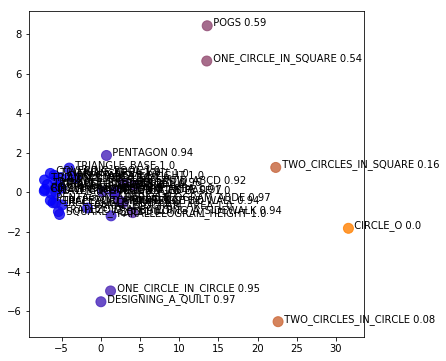

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

# select_ixs = list(set(list(all_qz.flatten()))) # just get the unique q indices used in our test set
select_ixs = list(numpy.unique(all_qz.flatten()))

# tmp = []
# for ix in select_ixs:
#     qid = qixs[ix]
#     prate = (q_pass[qid]/q_atts[qid]) if q_atts[qid]>0 else 1
#     if prate<1:
#         tmp.append(ix)
# select_ixs = tmp
        
q_weights = qn_table.get_weights()[0]
min_q = numpy.min(q_weights)
min_s = numpy.min(s_table.get_weights()[0])
min_w = min(min_q, min_s)

q_weights = (q_weights - min_w)


# itemz_2 = q_weights
itemz_2 = pca.fit_transform(q_weights)



fig = plt.gcf()
fig.set_size_inches(6, 6)

import scipy, math
norms = []
for i in select_ixs:
    w = q_weights[i,:]
    norm = scipy.linalg.norm(w)
    norms.append(norm)

norms = numpy.array(norms)-numpy.min(norms)
norms = norms/numpy.max(norms)
rgba_colours = numpy.array([(n,n/2,1-n,0.8) for n in norms])
# rgba_colours = numpy.array([(1,0,0,n) for n in norms])
# print(rgba_colours)

#n = len(itemz_2)
# fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
fig.gca().scatter(itemz_2[select_ixs,0], itemz_2[select_ixs,1], color=rgba_colours, s=100)
for qix in select_ixs: # set(tqz.flatten()):
    add_star=False
    if sum(qz==qix)==0:
        add_star=True
    qid = qixs[qix]
    print(qix, qid)
#     print(q)
    w = q_weights[qix,:]
    norm = scipy.linalg.norm(w)
    print(qid)
    x,y = itemz_2[qix,0], itemz_2[qix,1]
#     fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
    prate = q_pass[qid]/q_atts[qid]
    kcs = p_kc[qid]
#     kcs = "\n".join([k[4:] for k in kcs])
    steps = len(p_st[qid])
    fig.gca().annotate("  {} {}".format(qid,round(prate,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}x{}".format(qid,steps,kcs), (itemz_2[q,0], itemz_2[q,1]))
#     fig.gca().annotate("{} {}\n({} {}) {}".format(("***" if add_star else ""), qid, steps, len(kcs), round(prate,2), round(norm,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}\n({})".format(("***" if add_star else ""), qid, kcs), (itemz_2[qix,0], itemz_2[qix,1]))
fig.show()

In [129]:
import sys
numpy.set_printoptions(precision=4, suppress=True, threshold=sys.maxsize)
# for ix in select_ixs:
#     print(ix, qixs[ix], sum(qz==ix), sum(tqz==ix), q_weights[ix,:], scipy.linalg.norm(q_weights[ix,:]))
#     print(ix, qixs[ix], sum(qz==ix), sum(tqz==ix), round(scipy.linalg.norm(q_weights[ix,:]),2))

for ix in select_ixs:
    print(qixs[ix],"\n", q_weights[ix])
    print(numpy.sum(q_weights[ix]>1))


DOG_ON_A_ROPE 
 [ 0.532   6.5459  4.176   6.5345  0.5987  2.1903  2.4508  4.9511  1.9104
  1.7587  6.3048  1.8964  4.0362  1.2642  1.8006]
13
LAWN_SPRINKLER_2 
 [ 0.6601  1.8965  3.2236  2.5014  0.002   0.886   2.1291  1.6411  1.5438
  0.7253  1.7609  1.7202  1.7499  0.6429  1.6699]
10
CIRCLE_DIAMETER 
 [ 1.1084  1.1459  2.6807  0.9589  0.398   1.5268  0.8187  0.0653  1.4039
  1.5149  0.7446  1.4494  1.9849  0.0707  0.3881]
8
CIRCLE_AREA 
 [ 1.3469  1.6194  2.2872  2.1749  1.6524  1.7039  1.5219  2.4168  0.3711
  1.3616  1.843   1.0289  1.751   1.514   1.7716]
14
CIRCLE_CIRCUMFERENCE 
 [ 0.8534  1.65    2.4454  1.4945  0.3445  1.1803  2.4857  1.8632  2.2409
  0.4439  0.8091  1.7451  1.9945  0.2343  1.2035]
10
LAWN_SPRINKLER 
 [ 1.3617  1.8094  2.6508  2.0301  0.4371  1.1659  1.4221  1.4724  1.6038
  0.6918  1.5132  1.6473  1.8772  1.0162  1.3164]
13
CIRCLE_RADIUS 
 [ 1.1451  2.4007  3.3505  1.7917  0.5083  1.5359  2.118   1.2255  1.0498
  1.991   2.1237  1.8348  2.1069  0.6362  1.5419]

0
PARALLELOGRAM_HEIGHT
1
PARALLELOGRAM_HEIGHT
2
PARALLELOGRAM_HEIGHT
3
PARALLELOGRAM_HEIGHT
4
PARALLELOGRAM_HEIGHT
5
PARALLELOGRAM_HEIGHT
6
PARALLELOGRAM_HEIGHT
7
PARALLELOGRAM_HEIGHT
8
PARALLELOGRAM_HEIGHT
9
PARALLELOGRAM_HEIGHT
10
PARALLELOGRAM_HEIGHT
11
PARALLELOGRAM_HEIGHT
12
PARALLELOGRAM_HEIGHT
13
PARALLELOGRAM_HEIGHT
14
PARALLELOGRAM_HEIGHT
15
PARALLELOGRAM_HEIGHT
16
PARALLELOGRAM_HEIGHT
17
PARALLELOGRAM_HEIGHT
18
PARALLELOGRAM_HEIGHT
19
PARALLELOGRAM_HEIGHT
20
PARALLELOGRAM_HEIGHT
21
PARALLELOGRAM_HEIGHT
22
PARALLELOGRAM_HEIGHT
23
PARALLELOGRAM_HEIGHT
24
PARALLELOGRAM_HEIGHT
25
PARALLELOGRAM_HEIGHT
26
PARALLELOGRAM_HEIGHT
27
PARALLELOGRAM_HEIGHT
28
PARALLELOGRAM_HEIGHT
29
PARALLELOGRAM_HEIGHT
30
PARALLELOGRAM_HEIGHT
31
PARALLELOGRAM_HEIGHT
32
PARALLELOGRAM_HEIGHT
33
PARALLELOGRAM_HEIGHT
34
PARALLELOGRAM_HEIGHT
35
PARALLELOGRAM_HEIGHT
36
PARALLELOGRAM_HEIGHT
37
PARALLELOGRAM_HEIGHT
38
PARALLELOGRAM_HEIGHT
39
PARALLELOGRAM_HEIGHT
40
PARALLELOGRAM_HEIGHT
41
PARALLELOGRAM_HEIGHT
42

/home/rjm49/.venvs/isaac/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


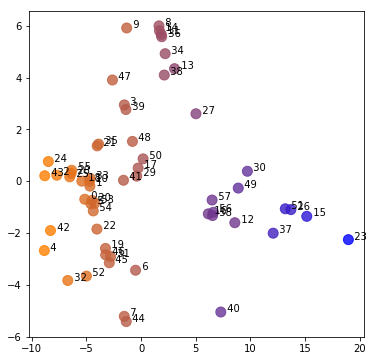

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

# select_ixs = list(set(list(all_qz.flatten()))) # just get the unique q indices used in our test set
select_ixs = list(numpy.unique(all_sz.flatten()))

# tmp = []
# for ix in select_ixs:
#     qid = qixs[ix]
#     prate = (q_pass[qid]/q_atts[qid]) if q_atts[qid]>0 else 1
#     if prate<1:
#         tmp.append(ix)
# select_ixs = tmp
        
s_weights = s_table.get_weights()[0]
min_q = numpy.min(qn_table.get_weights()[0])
min_s = numpy.min(s_table.get_weights()[0])
min_w = min(min_q, min_s)

s_weights = (s_weights - min_w)


# itemz_2 = q_weights
itemz_2 = pca.fit_transform(s_weights)

fig = plt.gcf()
fig.set_size_inches(6, 6)

import scipy, math
norms = []
for i in select_ixs:
    w = s_weights[i,:]
    norm = scipy.linalg.norm(w)
    norms.append(norm)

norms = numpy.array(norms)-numpy.min(norms)
norms = norms/numpy.max(norms)
rgba_colours = numpy.array([(n,n/2,1-n,0.8) for n in norms])
# rgba_colours = numpy.array([(1,0,0,n) for n in norms])
# print(rgba_colours)

#n = len(itemz_2)
# fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
fig.gca().scatter(itemz_2[select_ixs,0], itemz_2[select_ixs,1], color=rgba_colours, s=100)
for six in select_ixs: # set(tqz.flatten()):
    print(six)
    add_star=False
    if sum(sz==six)==0:
        add_star=True
#     qid = qixs[qix]
#     print(qix, qid)
#     print(q)
    w = s_weights[six,:]
    norm = scipy.linalg.norm(w)
    print(qid)
    x,y = itemz_2[six,0], itemz_2[six,1]
#     fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
#     prate = q_pass[qid]/q_atts[qid]
#     kcs = p_kc[qid]
#     kcs = "\n".join([k[4:] for k in kcs])
    steps = len(p_st[qid])
    fig.gca().annotate("  {}".format(six), (x,y))
#     fig.gca().annotate("{} {}x{}".format(qid,steps,kcs), (itemz_2[q,0], itemz_2[q,1]))
#     fig.gca().annotate("{} {}\n({} {}) {}".format(("***" if add_star else ""), qid, steps, len(kcs), round(prate,2), round(norm,2)), (itemz_2[qix,0], itemz_2[qix,1]))
#     fig.gca().annotate("{} {}\n({})".format(("***" if add_star else ""), qid, kcs), (itemz_2[qix,0], itemz_2[qix,1]))
fig.show()

In [145]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout, Input, Lambda, Dense
from keras import backend as K
from keras import Model
def generate_multilabel_model(n_factors, optimiser):
    qn_emb = Input(shape=(n_factors,), name="q_embedding")
    
    h = Dense(10, activation="relu")(qn_emb)
#     h = Dense(30, activation="relu")(h)
    kc_pred = Dense(len(KCs), activation="sigmoid")(h)
    
    model = Model(inputs=qn_emb, outputs=kc_pred)
    model.compile(optimizer=optimiser, loss="binary_crossentropy", metrics=["accuracy"])
#     model.compile(optimizer=optimiser, loss="mse", metrics=["accuracy"])

    print(model.summary())

    return model

In [146]:
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)
qws = qn_table.get_weights()[0]
qn_embs = []
kc_list = []
KCs = list(KCs)

ixs = [ix for ix in range(len(qws))]
tr_ixs = numpy.random.choice(ixs, size=int(0.75*len(ixs)), replace=False)
tt_ixs = set(ixs) - set(tr_ixs)
for ix in tr_ixs:
    qid = qixs[ix]
    qn_embs.append(qws[ix])
    kcs = p_kc[qid]
    kc_ohe = [0 for _ in KCs]
    for kc in kcs:
        kcix = KCs.index(kc)
        kc_ohe[kcix] = 1
    kc_list.append(kc_ohe)

qn_embs = numpy.array(qn_embs)
kc_list = numpy.array(kc_list)

kc_sums = numpy.sum(kc_list, axis=0)
print("KC sums", kc_sums)
class_wgts = {}
for ix,kcs in enumerate(kc_sums):
    class_wgts[ix] = 1.0/kcs

print(class_wgts)
    

KC sums [ 9  5  1  1  5  2 10  7  3  4  2  2  3  4  2]
{0: 0.1111111111111111, 1: 0.20000000000000001, 2: 1.0, 3: 1.0, 4: 0.20000000000000001, 5: 0.5, 6: 0.10000000000000001, 7: 0.14285714285714285, 8: 0.33333333333333331, 9: 0.25, 10: 0.5, 11: 0.5, 12: 0.33333333333333331, 13: 0.25, 14: 0.5}


In [151]:
print("QN embs\n", qn_embs)
print("KC list\n",kc_list)

emb_mod = generate_multilabel_model(n_factors, Adam())
emb_mod.fit(qn_embs, kc_list, epochs = 1000000, validation_split=0.1, class_weight=class_wgts, callbacks=[es])

qn_embs = []
kc_list = []
for ix in tt_ixs:
    qid = qixs[ix]
    qn_embs.append(qws[ix])
    kcs = p_kc[qid]
    kc_ohe = [0 for _ in KCs]
    for kc in kcs:
        kcix = KCs.index(kc)
        kc_ohe[kcix] = 1
    kc_list.append(kc_ohe)

qn_embs = numpy.array(qn_embs)
kc_list = numpy.array(kc_list)
print("QN embs\n", qn_embs)
print("KC list\n",kc_list)

print("test:", emb_mod.evaluate(qn_embs, kc_list))
predz = emb_mod.predict(qn_embs)
print((predz>=0.5).astype(int))
print(confusion_matrix(kc_list.flatten(), (predz.flatten() >= 0.5 )))

QN embs
 [[  6.8276   6.0891  11.1078   7.8637   9.5476  12.3996   7.3236  12.2517
   10.5589   9.8908   5.8202   8.302   10.5718   5.8129   7.845 ]
 [  0.6601   1.8965   3.2236   2.5014   0.002    0.886    2.1291   1.6411
    1.5438   0.7253   1.7609   1.7202   1.7499   0.6429   1.6699]
 [  2.1774   2.1052   3.3958   1.6539   2.28     3.0459   3.4954   2.9426
    2.3025   1.8063   2.4976   3.1063   3.5464   1.474    2.1466]
 [  0.8534   1.65     2.4454   1.4945   0.3445   1.1803   2.4857   1.8632
    2.2409   0.4439   0.8091   1.7451   1.9945   0.2343   1.2035]
 [  1.1451   2.4007   3.3505   1.7917   0.5083   1.5359   2.118    1.2255
    1.0498   1.991    2.1237   1.8348   2.1069   0.6362   1.5419]
 [  0.7325   1.0044   3.5428   2.0986   0.6311   1.5495   2.6326   1.3431
    1.2662   0.6366   2.0612   1.8354   1.4621   0.6319   1.297 ]
 [  1.0302   1.4977   3.2007   1.7473   1.1      1.6508   1.5368   1.5492
    0.8859   1.4256   1.5868   1.5679   2.1359   1.2543   1.4032]
 [  0.0636 

Epoch 43/1000000
9/9 [==============================] - 0s 818us/step - loss: 0.2111 - acc: 0.6370 - val_loss: 0.2331 - val_acc: 0.4667
Epoch 44/1000000
9/9 [==============================] - 0s 707us/step - loss: 0.2091 - acc: 0.6296 - val_loss: 0.2313 - val_acc: 0.4667
Epoch 45/1000000
9/9 [==============================] - 0s 755us/step - loss: 0.2071 - acc: 0.6296 - val_loss: 0.2296 - val_acc: 0.4667
Epoch 46/1000000
9/9 [==============================] - 0s 532us/step - loss: 0.2052 - acc: 0.6296 - val_loss: 0.2280 - val_acc: 0.4667
Epoch 47/1000000
9/9 [==============================] - 0s 666us/step - loss: 0.2033 - acc: 0.6296 - val_loss: 0.2263 - val_acc: 0.4667
Epoch 48/1000000
9/9 [==============================] - 0s 817us/step - loss: 0.2014 - acc: 0.6296 - val_loss: 0.2247 - val_acc: 0.4667
Epoch 49/1000000
9/9 [==============================] - 0s 932us/step - loss: 0.1996 - acc: 0.6444 - val_loss: 0.2232 - val_acc: 0.4667
Epoch 50/1000000
9/9 [==========================

Epoch 104/1000000
9/9 [==============================] - 0s 625us/step - loss: 0.1425 - acc: 0.8296 - val_loss: 0.1550 - val_acc: 0.5333
Epoch 105/1000000
9/9 [==============================] - 0s 628us/step - loss: 0.1419 - acc: 0.8296 - val_loss: 0.1546 - val_acc: 0.5333
Epoch 106/1000000
9/9 [==============================] - 0s 840us/step - loss: 0.1412 - acc: 0.8296 - val_loss: 0.1541 - val_acc: 0.5333
Epoch 107/1000000
9/9 [==============================] - 0s 475us/step - loss: 0.1406 - acc: 0.8296 - val_loss: 0.1537 - val_acc: 0.5333
Epoch 108/1000000
9/9 [==============================] - 0s 706us/step - loss: 0.1400 - acc: 0.8296 - val_loss: 0.1533 - val_acc: 0.5333
Epoch 109/1000000
9/9 [==============================] - 0s 782us/step - loss: 0.1393 - acc: 0.8296 - val_loss: 0.1530 - val_acc: 0.5333
Epoch 110/1000000
9/9 [==============================] - 0s 814us/step - loss: 0.1387 - acc: 0.8296 - val_loss: 0.1526 - val_acc: 0.6000
Epoch 111/1000000
9/9 [==================